In [1]:
# Importing libraries needed for the project objective
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

In [2]:
# Loading the 'po2_data.csv' dataset into the dataframe using pandas
df = pd.read_csv('po2_data.csv')

In [3]:
# head() function used to display rows to check data loading
df.head()

,subject#,age,sex,test_time,motor_updrs,total_updrs,jitter(%),jitter(abs),jitter(rap),jitter(ppq5),...,shimmer(abs),shimmer(apq3),shimmer(apq5),shimmer(apq11),shimmer(dda),nhr,hnr,rpde,dfa,ppe
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [5]:
# checking for null or missing data and printing to check it
missing_data = df.isnull().sum()
print("Missing Data:")
print(missing_data)

Missing Data:
subject#          0
age               0
sex               0
test_time         0
motor_updrs       0
total_updrs       0
jitter(%)         0
jitter(abs)       0
jitter(rap)       0
jitter(ppq5)      0
jitter(ddp)       0
shimmer(%)        0
shimmer(abs)      0
shimmer(apq3)     0
shimmer(apq5)     0
shimmer(apq11)    0
shimmer(dda)      0
nhr               0
hnr               0
rpde              0
dfa               0
ppe               0
dtype: int64


In [6]:
# Data type of the columns
df_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   subject#        5875 non-null   int64  
 1   age             5875 non-null   int64  
 2   sex             5875 non-null   int64  
 3   test_time       5875 non-null   float64
 4   motor_updrs     5875 non-null   float64
 5   total_updrs     5875 non-null   float64
 6   jitter(%)       5875 non-null   float64
 7   jitter(abs)     5875 non-null   float64
 8   jitter(rap)     5875 non-null   float64
 9   jitter(ppq5)    5875 non-null   float64
 10  jitter(ddp)     5875 non-null   float64
 11  shimmer(%)      5875 non-null   float64
 12  shimmer(abs)    5875 non-null   float64
 13  shimmer(apq3)   5875 non-null   float64
 14  shimmer(apq5)   5875 non-null   float64
 15  shimmer(apq11)  5875 non-null   float64
 16  shimmer(dda)    5875 non-null   float64
 17  nhr             5875 non-null   f

In [9]:
#EDA
data = df.drop(["subject#"], axis = 1)
# Descriptive statistics of tall the variables in the dataset to get the summary overview of the dataset
descriptive_stats = data.describe()
print("Descriptive Statistics:")
print(descriptive_stats)

Descriptive Statistics:
               age          sex    test_time  motor_updrs  total_updrs  \
count  5875.000000  5875.000000  5875.000000  5875.000000  5875.000000   
mean     64.804936     0.317787    92.863722    21.296229    29.018942   
std       8.821524     0.465656    53.445602     8.129282    10.700283   
min      36.000000     0.000000    -4.262500     5.037700     7.000000   
25%      58.000000     0.000000    46.847500    15.000000    21.371000   
50%      65.000000     0.000000    91.523000    20.871000    27.576000   
75%      72.000000     1.000000   138.445000    27.596500    36.399000   
max      85.000000     1.000000   215.490000    39.511000    54.992000   

         jitter(%)  jitter(abs)  jitter(rap)  jitter(ppq5)  jitter(ddp)  ...  \
count  5875.000000  5875.000000  5875.000000   5875.000000  5875.000000  ...   
mean      0.006154     0.000044     0.002987      0.003277     0.008962  ...   
std       0.005624     0.000036     0.003124      0.003732     0.0093

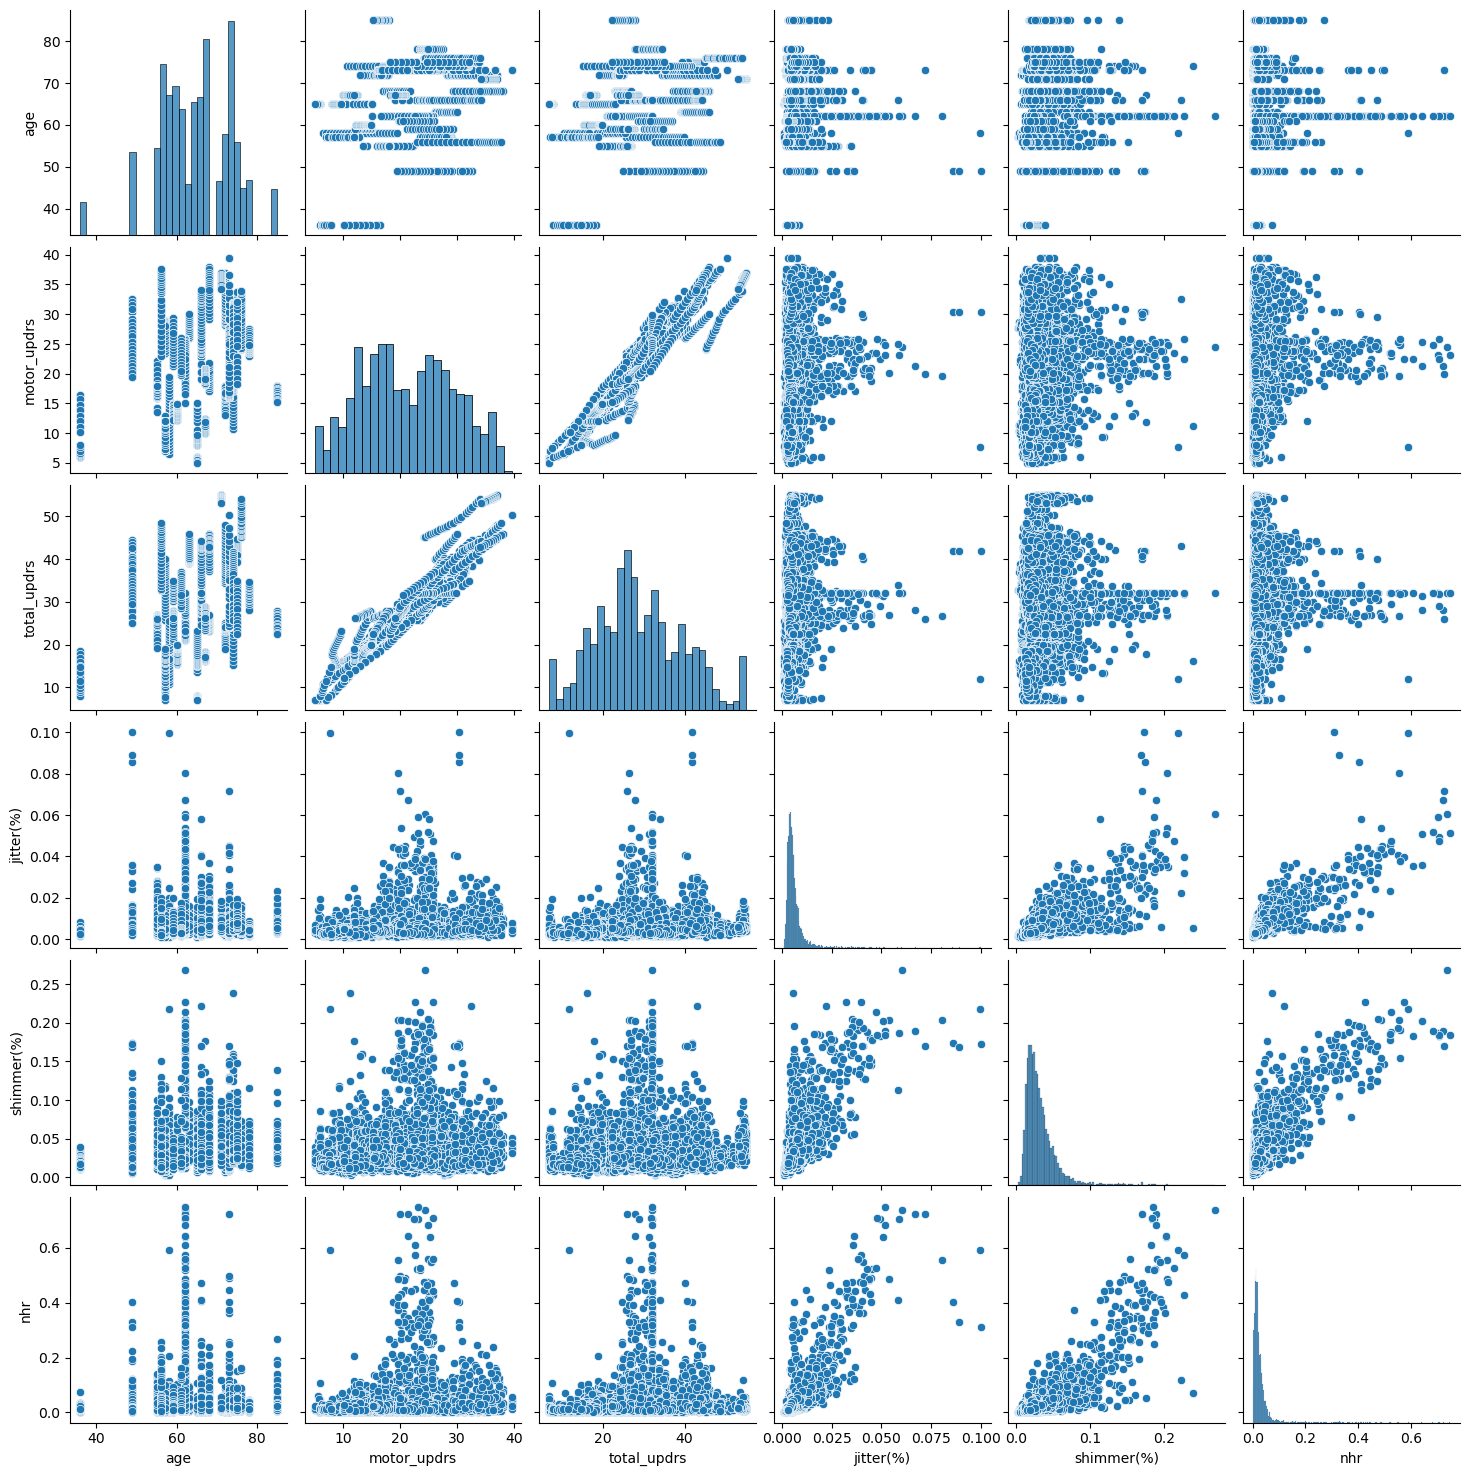

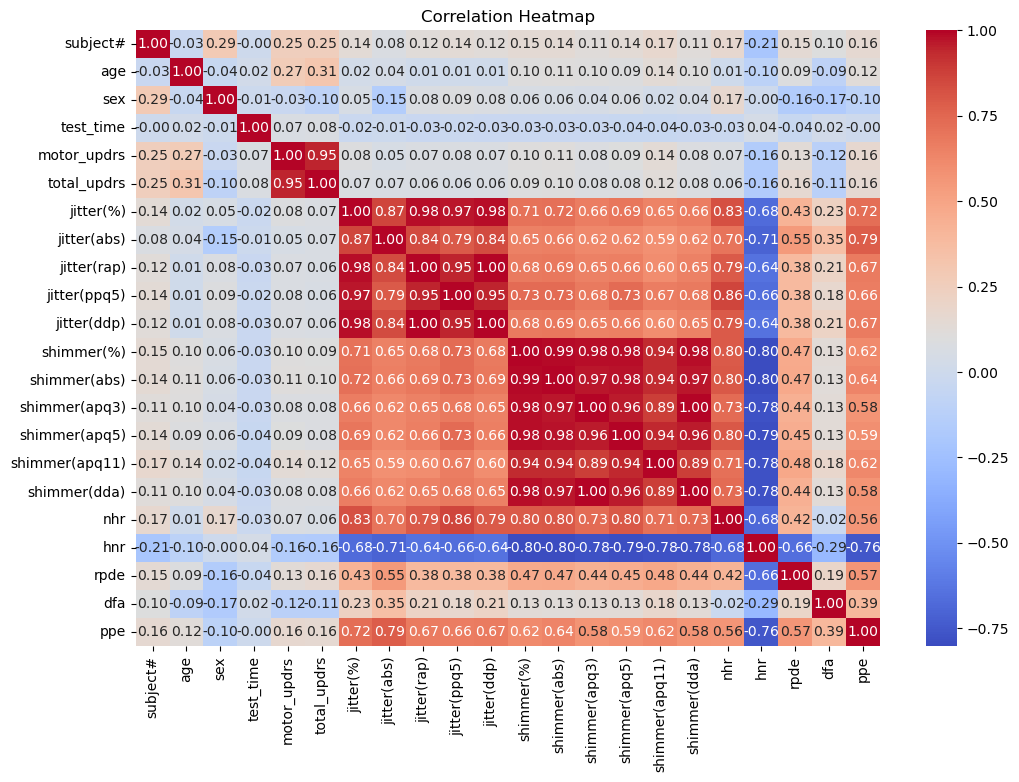

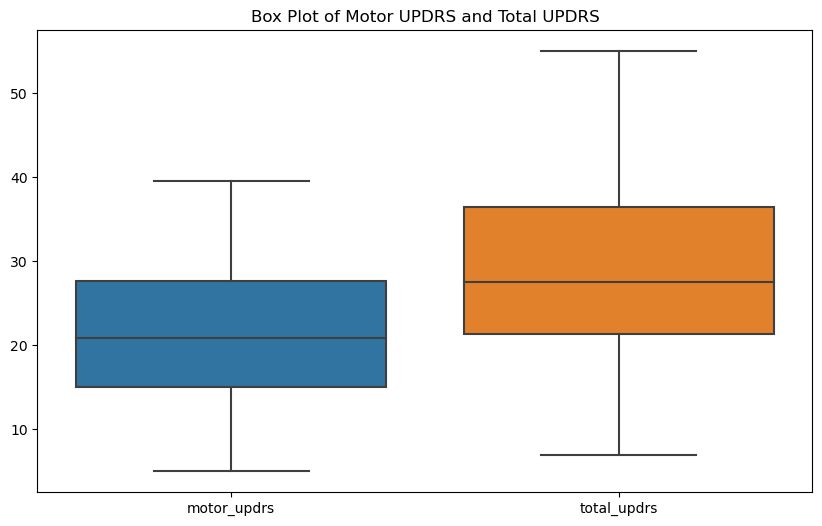

In [22]:
# visualise the pairplot for the scatter matrix
sns.pairplot(df, vars=['age', 'motor_updrs', 'total_updrs', 'jitter(%)', 'shimmer(%)', 'nhr'])
plt.show()

In [ ]:
# creating correlation matrix heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [24]:
from sklearn.preprocessing import PowerTransformer

#featuring selection and engineering

# Selecting the predictor variables
predictors = ['age', 'sex', 'jitter(%)', 'shimmer(%)', 'nhr']

# Targeting the variables
target_motor_updrs = 'motor_updrs'
target_total_updrs = 'total_updrs'

selected_data = data[predictors + [target_motor_updrs, target_total_updrs]]

#featuring engineering
# Applying the Yeo-Johnson transformation to address non-Gaussian distributions
from sklearn.preprocessing import PowerTransformer

# Selecting columns for transformation (excluding subject#)
columns_to_transform = selected_data.columns[:-2]  # Exclude the target variables

# Initializing the PowerTransformer
transformer = PowerTransformer(method='yeo-johnson')

# Fitting and transforming the data
selected_data.loc[:, columns_to_transform] = transformer.fit_transform(selected_data.loc[:, columns_to_transform])

# To check the transformed data displaying the first few rows 
selected_data.head()


,age,sex,jitter(%),shimmer(%),nhr,motor_updrs,total_updrs
0,0.81231,-0.682509,0.588512,-0.197574,-0.468728,28.199,34.398
1,0.81231,-0.682509,-1.067277,-0.656085,-0.736937,28.447,34.894
2,0.81231,-0.682509,-0.107247,-0.995944,-0.028363,28.695,35.389
3,0.81231,-0.682509,0.095451,-0.404883,0.439521,28.905,35.810
4,0.81231,-0.682509,-0.856744,-0.967280,-0.691990,29.187,36.375


In [25]:
#LINEAR REGRESSION
# from the response variables (y) separating explanatory variables (X) 
X = selected_data[predictors]
y_motor = selected_data[target_motor_updrs]
y_total = selected_data[target_total_updrs]

# Splitting the dataset into training and test sets (e.g., 60% train, 40% test)
X_train, X_test, y_motor_train, y_motor_test, y_total_train, y_total_test = train_test_split(X, y_motor, y_total, test_size=0.4, random_state=42)
# Build a linear regression model for motor UPDRS
model_motor = LinearRegression()
model_motor.fit(X_train, y_motor_train)

# for total UPDRS buildling a linear regression model 
model_total = LinearRegression()
model_total.fit(X_train, y_total_train)

# Predicting the values of motor UPDRS and total UPDRS on the test set
y_motor_pred = model_motor.predict(X_test)
y_total_pred = model_total.predict(X_test)


# Printing the intercept and coefficient learned by the linear regression model
print("Intercept motor UPDRS: ", model_motor.intercept_)
print("Coefficient motor UPDRS: ", model_motor.coef_)
df_pred = pd.DataFrame({"Actual motor": y_motor_test, "Predicted motor": y_motor_pred})
print(df_pred)

print("Intercept total UPDRS: ", model_total.intercept_)
print("Coefficient total UPDRS: ", model_total.coef_)
dtf_pred = pd.DataFrame({"Actual motor": y_total_test, "Predicted motor": y_total_pred})
print(dtf_pred)

# for motor UPDRS computing performance metrics 
mae_motor = metrics.mean_absolute_error(y_motor_test, y_motor_pred)
mse_motor = metrics.mean_squared_error(y_motor_test, y_motor_pred)
rmse_motor = math.sqrt(mse_motor)
r2_motor = metrics.r2_score(y_motor_test, y_motor_pred)

#  for total UPDRS computing performance metrics
mae_total = metrics.mean_absolute_error(y_total_test, y_total_pred)
mse_total = metrics.mean_squared_error(y_total_test, y_total_pred)
rmse_total = math.sqrt(mse_total)
r2_total = metrics.r2_score(y_total_test, y_total_pred)

# Calculating the number of predictors (features)
num_predictors = X_train.shape[1]

#for motor UPDRS calculating adjusted R-squared 
adj_r2_motor = 1 - ((1 - r2_motor) * (len(y_motor_test) - 1) / (len(y_motor_test) - num_predictors - 1))

#  for total UPDRS calculating adjusted R-squared
adj_r2_total = 1 - ((1 - r2_total) * (len(y_total_test) - 1) / (len(y_total_test) - num_predictors - 1))


# Print the performance metrics for both motor and total UPDRS
print("Performance Metrics for Motor UPDRS:")
print("MAE: ", mae_motor)
print("MSE: ", mse_motor)
print("RMSE: ", rmse_motor)
print("R-squared: ", r2_motor)
print("Adjusted R-squared: ", adj_r2_motor)

print("\nPerformance Metrics for Total UPDRS:")
print("MAE: ", mae_total)
print("MSE: ", mse_total)
print("RMSE: ", rmse_total)
print("R-squared: ", r2_total)
print("Adjusted R-squared: ", adj_r2_total)
print("-------------------------------------------------------------------------------")


# Calculate the mean of 'motor_updrs' and 'total_updrs' in the training set
mean_motor = np.mean(y_motor_train)
mean_total = np.mean(y_total_train)

# Replicate the mean values as many times as there are values in the test set for both response variables
y_pred_base_motor = [mean_motor] * len(y_motor_test)
y_pred_base_total = [mean_total] * len(y_total_test)

# Optional: Show the predicted values of 'motor_updrs' and 'total_updrs' next to the actual values
df_base_pred_motor = pd.DataFrame({"Actual (Motor)": y_motor_test, "Predicted (Motor)": y_pred_base_motor})
df_base_pred_total = pd.DataFrame({"Actual (Total)": y_total_test, "Predicted (Total)": y_pred_base_total})
print("Baseline Predictions for Motor UPDRS:")
print(df_base_pred_motor)
print("\nBaseline Predictions for Total UPDRS:")
print(df_base_pred_total)

# Compute standard performance metrics of the baseline model for both response variables

# Metrics for Motor UPDRS
mae_motor = metrics.mean_absolute_error(y_motor_test, y_pred_base_motor)
mse_motor = metrics.mean_squared_error(y_motor_test, y_pred_base_motor)
rmse_motor = math.sqrt(mse_motor)
rmse_norm_motor = rmse_motor / (y_motor.max() - y_motor.min())
r2_motor = metrics.r2_score(y_motor_test, y_pred_base_motor)

# Metrics for Total UPDRS
mae_total = metrics.mean_absolute_error(y_total_test, y_pred_base_total)
mse_total = metrics.mean_squared_error(y_total_test, y_pred_base_total)
rmse_total = math.sqrt(mse_total)
rmse_norm_total = rmse_total / (y_total.max() - y_total.min())
r2_total = metrics.r2_score(y_total_test, y_pred_base_total)

print("\nBaseline Performance Metrics for Motor UPDRS:")
print("MAE (Motor): ", mae_motor)
print("MSE (Motor): ", mse_motor)
print("RMSE (Motor): ", rmse_motor)
print("RMSE (Normalised) (Motor): ", rmse_norm_motor)
print("R^2 (Motor): ", r2_motor)

print("\nBaseline Performance Metrics for Total UPDRS:")
print("MAE (Total): ", mae_total)
print("MSE (Total): ", mse_total)
print("RMSE (Total): ", rmse_total)
print("RMSE (Normalised) (Total): ", rmse_norm_total)
print("R^2 (Total): ", r2_total)


Intercept motor UPDRS:  21.298620141517276
Coefficient motor UPDRS:  [ 2.13437849 -0.08785882  0.58716724 -0.20474049  0.49356537]
      Actual motor  Predicted motor
5366       33.0840        22.859428
4326        7.1599        14.868377
199        11.2180        20.688790
3260       12.7590        21.460628
4955       25.3910        22.560777
...            ...              ...
2664       18.0000        19.978431
2078       15.0000        20.187128
3308       12.2240        20.338804
5786       25.1470        19.533211
5472       17.1350        26.736231

[2350 rows x 2 columns]
Intercept total UPDRS:  29.070490540414198
Coefficient total UPDRS:  [ 3.14405232 -0.8621082   0.76801456 -0.32068249  0.57168105]
      Actual motor  Predicted motor
5366        43.563        31.512677
4326        12.060        18.653986
199         14.109        28.361561
3260        16.517        29.344410
4955        32.000        29.193968
...            ...              ...
2664        26.408        27.

In [26]:
#TASK 2
# Separate explanatory variables (X) from the response variables (y)
X = selected_data[predictors]
y_motor = selected_data[target_motor_updrs]
y_total = selected_data[target_total_updrs]

# Define different training and test set ratios
ratios = [(0.5, 0.5), (0.6, 0.4), (0.7, 0.3), (0.8, 0.2)]

for train_ratio, test_ratio in ratios:
    # Split the dataset into training and test sets
    X_train, X_test, y_motor_train, y_motor_test, y_total_train, y_total_test = train_test_split(
        X, y_motor, y_total, test_size=test_ratio, random_state=42)

    # Build a linear regression model for motor UPDRS
    model_motor = LinearRegression()
    model_motor.fit(X_train, y_motor_train)

    # Build a linear regression model for total UPDRS
    model_total = LinearRegression()
    model_total.fit(X_train, y_total_train)

    # Predict the values of motor UPDRS and total UPDRS on the test set
    y_motor_pred = model_motor.predict(X_test)
    y_total_pred = model_total.predict(X_test)

    # Calculate performance metrics for motor UPDRS
    mae_motor = metrics.mean_absolute_error(y_motor_test, y_motor_pred)
    mse_motor = metrics.mean_squared_error(y_motor_test, y_motor_pred)
    rmse_motor = math.sqrt(mse_motor)
    r2_motor = metrics.r2_score(y_motor_test, y_motor_pred)

    # Calculate performance metrics for total UPDRS
    mae_total = metrics.mean_absolute_error(y_total_test, y_total_pred)
    mse_total = metrics.mean_squared_error(y_total_test, y_total_pred)
    rmse_total = math.sqrt(mse_total)
    r2_total = metrics.r2_score(y_total_test, y_total_pred)

    # Calculate the number of predictors (features)
    num_predictors = X_train.shape[1]

    # Calculate adjusted R-squared for motor UPDRS
    adj_r2_motor = 1 - ((1 - r2_motor) * (len(y_motor_test) - 1) / (len(y_motor_test) - num_predictors - 1))

    # Calculate adjusted R-squared for total UPDRS
    adj_r2_total = 1 - ((1 - r2_total) * (len(y_total_test) - 1) / (len(y_total_test) - num_predictors - 1))

    # for both motor and total UPDRS, including adjusted R-squared,printing the performance metrics 
    print(f"\nPerformance Metrics for {int(train_ratio*100)}% Training, {int(test_ratio*100)}% Test:")
    print("Motor UPDRS:")
    print("MAE: ", mae_motor)
    print("MSE: ", mse_motor)
    print("RMSE: ", rmse_motor)
    print("R-squared: ", r2_motor)
    print("Adjusted R-squared: ", adj_r2_motor)

    print("\nTotal UPDRS:")
    print("MAE: ", mae_total)
    print("MSE: ", mse_total)
    print("RMSE: ", rmse_total)
    print("R-squared: ", r2_total)
    print("Adjusted R-squared: ", adj_r2_total)


Performance Metrics for 50% Training, 50% Test:
Motor UPDRS:
MAE:  6.591684371832839
MSE:  59.5884591914576
RMSE:  7.719356138400249
R-squared:  0.08341888099191264
Adjusted R-squared:  0.081855816327847

Total UPDRS:
MAE:  8.255974820111206
MSE:  98.63159499352463
RMSE:  9.93134406782509
R-squared:  0.11701388332147089
Adjusted R-squared:  0.11550810890694418

Performance Metrics for 60% Training, 40% Test:
Motor UPDRS:
MAE:  6.517508342652392
MSE:  58.484018017825214
RMSE:  7.647484424163623
R-squared:  0.08551512338288203
Adjusted R-squared:  0.08356443038668515

Total UPDRS:
MAE:  8.18248753202499
MSE:  96.90799320995998
RMSE:  9.844185756575298
R-squared:  0.12181031983317747
Adjusted R-squared:  0.11993704833111518

Performance Metrics for 70% Training, 30% Test:
Motor UPDRS:
MAE:  6.624645234042447
MSE:  59.776834802654825
RMSE:  7.731548021105141
R-squared:  0.08280467668545288
Adjusted R-squared:  0.08019455908922479

Total UPDRS:
MAE:  8.297675386626992
MSE:  98.729778869805

In [27]:

# Applying Z-score standardization to the explanatory variables
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

#  For the standardized explanatory variables adding a constant (intercept)
X_std = sm.add_constant(X_std)

# Building and evaluating the linear regression model for motor_updrs
model_motor = sm.OLS(y_motor, X_std).fit()
motor_details = model_motor.summary()
print("Motor UPDRS Model Summary:")
print(motor_details)

# for total_updrs buildling and evaluating the linear regression model 
model_total = sm.OLS(y_total, X_std).fit()
total_details = model_total.summary()
print("\nTotal UPDRS Model Summary:")
print(total_details)

Motor UPDRS Model Summary:
                            OLS Regression Results                            
Dep. Variable:            motor_updrs   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     95.45
Date:                Thu, 05 Oct 2023   Prob (F-statistic):               0.00
Time:                        01:34:13   Log-Likelihood:                -7507.1
No. Observations:                5875   AIC:                         1.506e+04
Df Residuals:                    5854   BIC:                         1.520e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.691e-16    

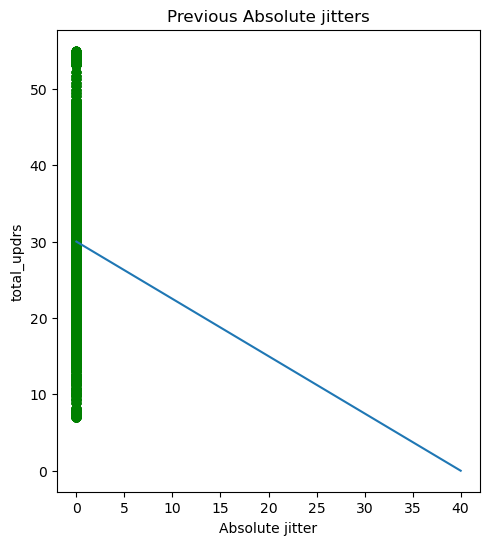

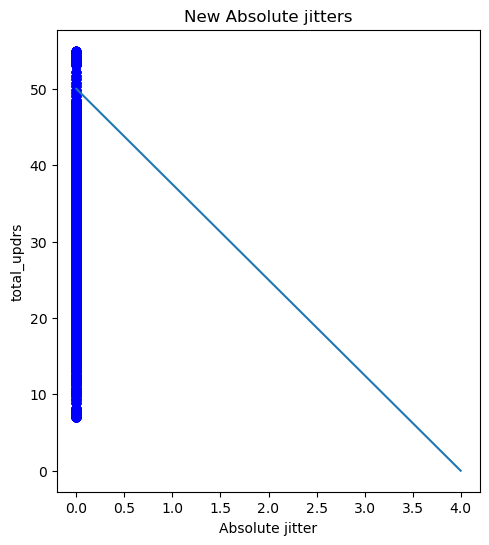

                            OLS Regression Results                            
Dep. Variable:        Absolute jitter   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.283e+32
Date:                Thu, 05 Oct 2023   Prob (F-statistic):               0.00
Time:                        08:07:34   Log-Likelihood:             1.8739e+05
No. Observations:                5875   AIC:                        -3.748e+05
Df Residuals:                    5873   BIC:                        -3.748e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.664e-15   6.81e-16     

In [13]:
# optimization absoulate
# Function to perform the log transformation
def log_transform(x):
    return np.log(x)

# Reading the dataset into a DataFrame
df = pd.read_csv("po2_data.csv")

#   For the "jitter(abs)" column applying the log transformation to
df["Absolute jitter"] = df["jitter(abs)"].apply(log_transform)

# To Rearrange the columns as needed
selected_columns = ['age', 'sex', 'test_time', 'jitter(%)', 'jitter(abs)', 'jitter(rap)', 'jitter(ppq5)',
                    'jitter(ddp)', 'shimmer(%)', 'shimmer(abs)', 'shimmer(apq3)', 'shimmer(apq5)', 'shimmer(apq11)',
                    'shimmer(dda)', 'nhr', 'hnr', 'rpde', 'dfa', 'ppe', 'motor_updrs', 'total_updrs', 'Absolute jitter']
df = df[selected_columns]

# Creating the first figure for the original "jitter(abs)" vs. "total_updrs" scatter plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(df["jitter(abs)"], df["total_updrs"], color="green")
plt.title("Previous Absolute jitters")
plt.xlabel("Absolute jitter")
plt.ylabel("total_updrs")
plt.plot([0, 40], [30, 0])

# Creating the second figure for the new "Absolute jitter" vs. "total_updrs" scatter plot
plt.figure(figsize=(12, 6))
plt.subplot(1,2,2)
plt.scatter(df["jitter(abs)"], df["total_updrs"], color="blue")
plt.title("New Absolute jitters")
plt.xlabel("Absolute jitter")
plt.ylabel("total_updrs")
plt.plot([0,4],[50,0])

plt.show()

# Dropping the original "jitter(abs)" column
df = df.drop("jitter(abs)", axis=1)

#  from the response variable (y)separating explanatory variables (x)
x = df.iloc[:,-1]
y = df.iloc[:,-1]

# Buildling and evaluating the linear regression model
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
pred = model.predict(x)
model_details = model.summary()
print(model_details)





In [18]:

# optimization gaussian transformation
data = pd.read_csv("po2_data.csv")

#  from the response variable (y) separating explanatory variables (X)
X_original = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Buildling and evaluating the initial linear regression model
X_const_original = sm.add_constant(X_original)
initial_model = sm.OLS(y, X_const_original).fit()
initial_predictions = initial_model.predict(X_const_original)
initial_model_summary = initial_model.summary()
print("Initial Linear Regression Model:")
print(initial_model_summary)

"""
APPLY POWER TRANSFORMER
"""

# Removing the previously added constant term
X_no_const = X_const_original.drop(["const"], axis=1)

# Creating a Yeo-Johnson transformer
power_transformer = PowerTransformer()

# Applying the transformer to make explanatory variables more Gaussian-like
X_transformed = power_transformer.fit_transform(X_no_const.values)

# Restoring column names of explanatory variables
X_transformed_df = pd.DataFrame(X_transformed, index=X_no_const.index, columns=X_no_const.columns)

"""
REBUILD AND REEVALUATE LINEAR REGRESSION USING STATSMODELS
USING GAUSSIAN-LIKE EXPLANATORY VARIABLES
"""

#  to the transformed explanatory variables adding a constant term
X_transformed_const = sm.add_constant(X_transformed_df)

# Building and evaluating the linear regression model with transformed variables
transformed_model = sm.OLS(y, X_transformed_const).fit()
transformed_predictions = transformed_model.predict(X_transformed_const)
transformed_model_summary = transformed_model.summary()
print("\nLinear Regression Model with Transformed Variables:")
print(transformed_model_summary)








Initial Linear Regression Model:
                            OLS Regression Results                            
Dep. Variable:                    ppe   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     975.2
Date:                Thu, 05 Oct 2023   Prob (F-statistic):               0.00
Time:                        04:01:54   Log-Likelihood:                 10132.
No. Observations:                5875   AIC:                        -2.022e+04
Df Residuals:                    5853   BIC:                        -2.007e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const      

Initial Linear Regression Model:
                            OLS Regression Results                            
Dep. Variable:                    ppe   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     975.2
Date:                Thu, 05 Oct 2023   Prob (F-statistic):               0.00
Time:                        08:48:32   Log-Likelihood:                 10132.
No. Observations:                5875   AIC:                        -2.022e+04
Df Residuals:                    5853   BIC:                        -2.007e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const      

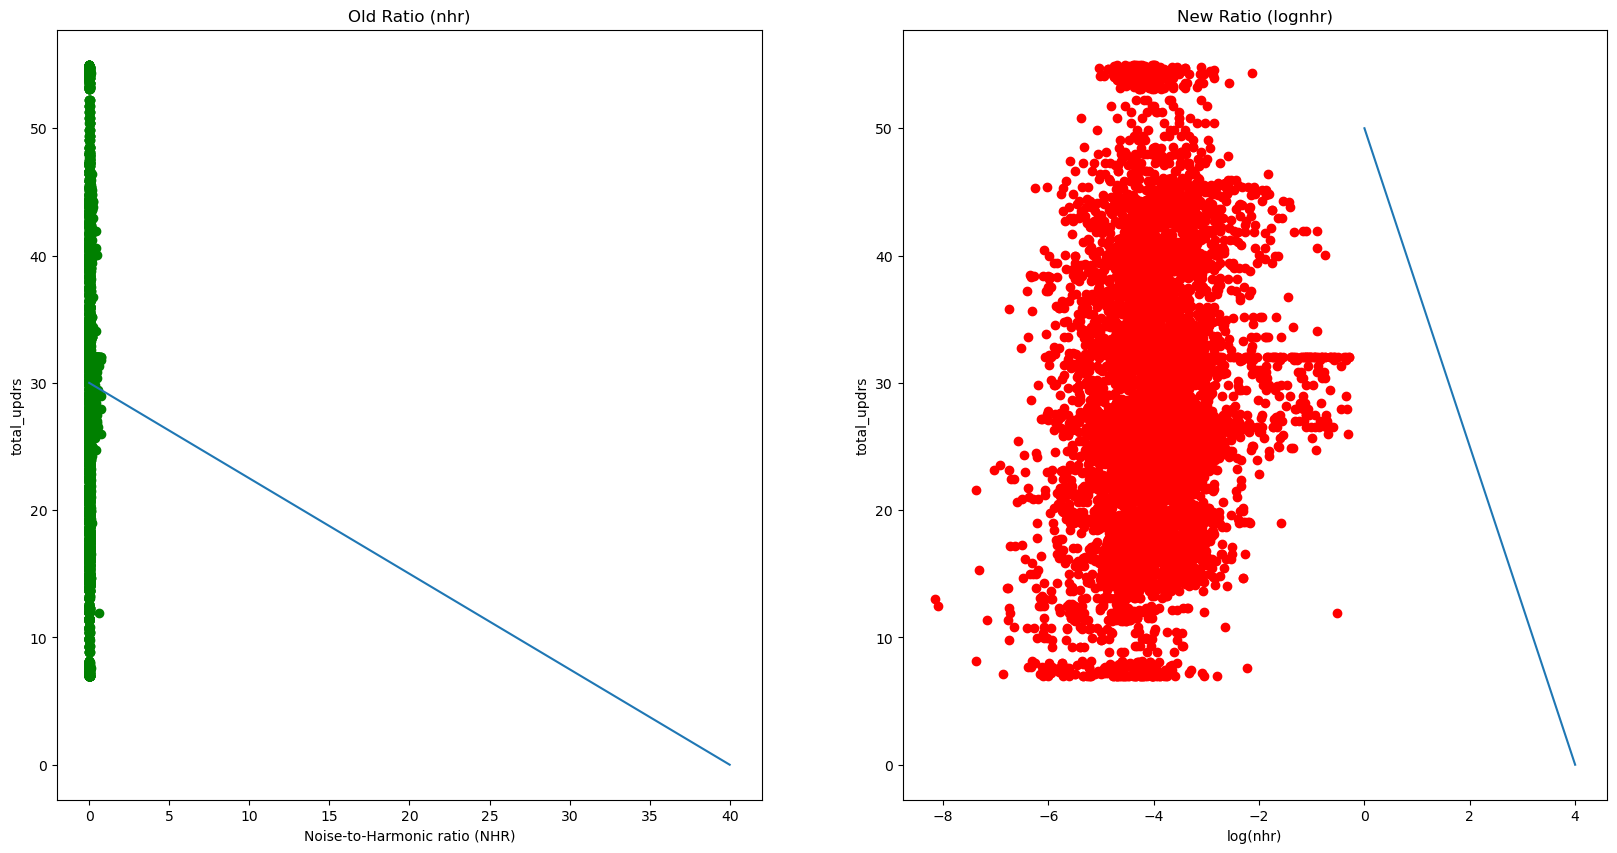


Linear Regression Model with Transformed Variable:
                            OLS Regression Results                            
Dep. Variable:                    ppe   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.391e+28
Date:                Thu, 05 Oct 2023   Prob (F-statistic):               0.00
Time:                        08:48:33   Log-Likelihood:             1.8401e+05
No. Observations:                5875   AIC:                        -3.680e+05
Df Residuals:                    5853   BIC:                        -3.678e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [28]:
#  log transformation on the "nhr" variable 
# Creating Function to perform the log transformation
def log_transform(x):
    return np.log(x)

# Reading the dataset into a DataFrame
df = pd.read_csv("po2_data.csv")

# Separating explanatory variables (x) from the response variable (y) for the initial linear regression
x_original = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Building and evaluating the initial linear regression model
x_original_const = sm.add_constant(x_original)
model_initial = sm.OLS(y, x_original_const).fit()
pred_initial = model_initial.predict(x_original_const)
model_initial_details = model_initial.summary()
print("Initial Linear Regression Model:")
print(model_initial_details)

# Applying a non-linear transformation to the "nhr" variable
df["lognhr"] = df["nhr"].apply(log_transform)

# Visualizing the effect of the transformation
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.scatter(df["nhr"], df["total_updrs"], color="green")
plt.title("Old Ratio (nhr)")
plt.xlabel("Noise-to-Harmonic ratio (NHR)")
plt.ylabel("total_updrs")
plt.plot([0, 40], [30, 0])

plt.subplot(1, 2, 2)
plt.scatter(df["lognhr"], df["total_updrs"], color="red")
plt.title("New Ratio (lognhr)")
plt.xlabel("log(nhr)")
plt.ylabel("total_updrs")
plt.plot([0, 4], [50, 0])

plt.show()

# Dropping the original "nhr" column
df = df.drop("nhr", axis=1)

# Separating explanatory variables (x) from the response variable (y) after transformation
x_transformed = df.iloc[:,:-1]

#  With the transformed variable buildling and evaluating the linear regression model
x_transformed_const = sm.add_constant(x_transformed)
model_transformed = sm.OLS(y, x_transformed_const).fit()
pred_transformed = model_transformed.predict(x_transformed_const)
model_transformed_details = model_transformed.summary()
print("\nLinear Regression Model with Transformed Variable:")
print(model_transformed_details)